In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# TODO: let user to choose data
file_path_data = "./test_data/weather_aizuwakamatsu_06_2024.csv"

data_all = pd.read_csv(file_path_data) # import csv into panda

print(data_all) # show first some row of data

         Unnamed: 0  sunlight  temperature  precipitation  weather
0     2024/6/1 1:00       0.0         12.7            0.4        4
1     2024/6/1 2:00       0.2         16.1            1.0        2
2     2024/6/1 3:00       0.8         20.4            0.0        2
3     2024/6/1 4:00       0.0         13.8            0.2        2
4     2024/6/1 5:00       0.3         14.0            0.0        2
..              ...       ...          ...            ...      ...
106  2024/6/5 11:00       0.6         21.7            0.0        4
107  2024/6/5 12:00       0.5         22.8            0.0        4
108  2024/6/5 13:00       0.8         23.8            0.0        2
109  2024/6/5 14:00       1.0         23.8            0.0        2
110  2024/6/5 15:00       1.0         24.0            0.0        2

[111 rows x 5 columns]


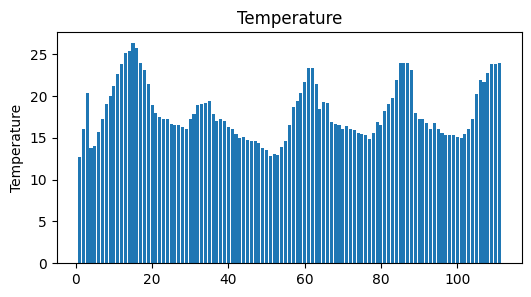

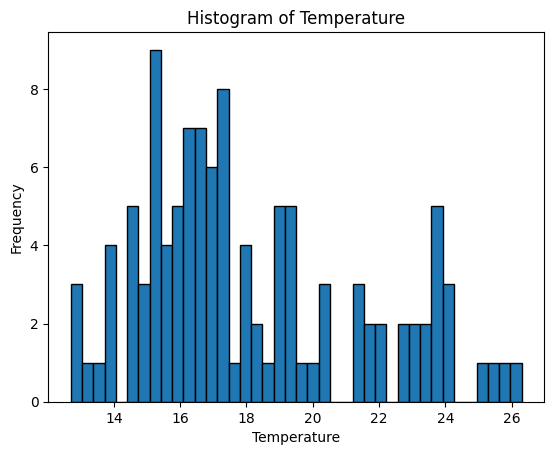

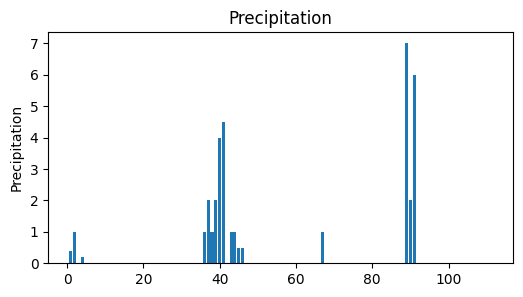

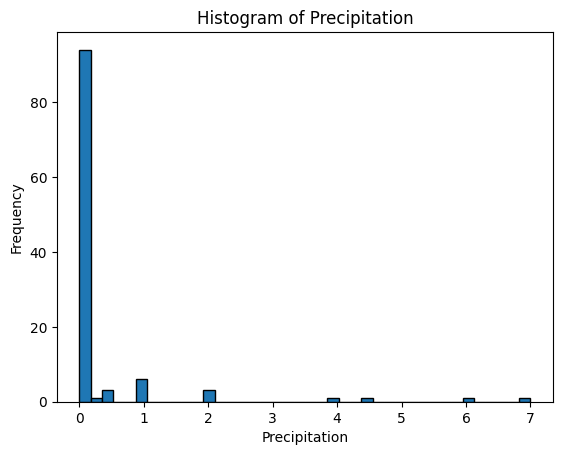

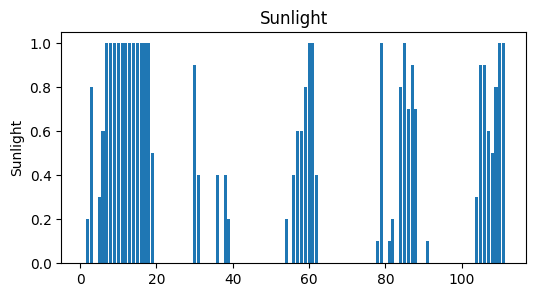

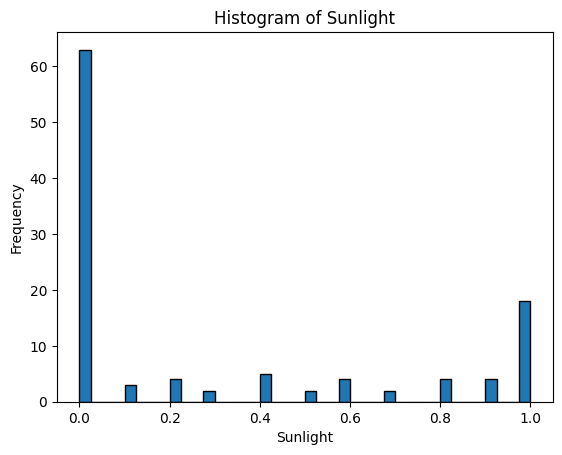

In [12]:
##----plot diagrams/histograms----##
# display graphs for user to determine threshold
data_list = {
    'Temperature': data_all['temperature'],
    'Precipitation': data_all['precipitation'],
    'Sunlight': data_all['sunlight']
}


for key in data_list:
  indices = np.arange(1, len(data_list[key])+1) # make indices for display
  plt.figure(figsize=(6, 3))
  plt.bar(indices, data_list[key])
  plt.title(key)
  plt.ylabel('Days')
  plt.ylabel(key)
  plt.show()

  # Display histogram
  plt.hist(data_list[key], bins=40, edgecolor='black')
  plt.title('Histogram of ' + key)
  plt.xlabel(key)
  plt.ylabel('Frequency')
  plt.show()

      Unnamed: 0  sunlight  temperature  precipitation  weather
0  2024/6/1 1:00       0.0         12.7            0.4        4
1  2024/6/1 2:00       0.2         16.1            1.0        2
2  2024/6/1 3:00       0.8         20.4            0.0        2
3  2024/6/1 4:00       0.0         13.8            0.2        2


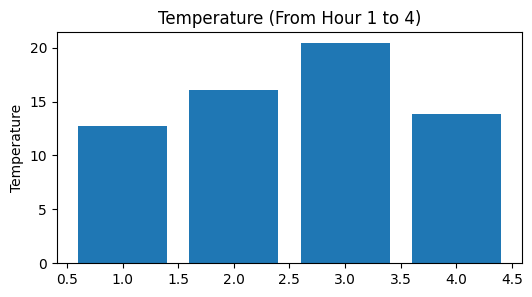

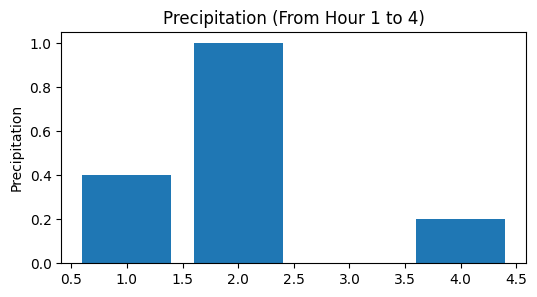

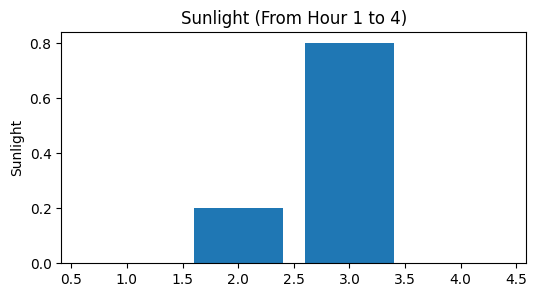

{'Temperature': [0.0, 0.44155844155844187, 1.0, 0.14285714285714304], 'Precipitation': [0.4, 1.0, 0.0, 0.2], 'Sunlight': [0.0, 0.25, 1.0, 0.0]}


In [13]:
##----function definition----##
def get_zscore(data_subset):
  zscore_subset = []
  data_subset[:] = zscore(data_subset)
  return zscore_subset


def get_normalized_data(data_subset):
  normalized_subset = []
  dt_max = max(data_subset)
  dt_min = min(data_subset)

  # normalization[0 1]
  normalized_subset[:] = (data_subset[:] - dt_min) / (dt_max - dt_min)
  return normalized_subset



##----define data to be used----##
# extract only 4 rows (hours) of data
# TODO: let user chose data range to be sonified
df_range_min = 0
df_range_max = 4

if df_range_max < df_range_min:
  print("range incorrect")
  pass

data_subset = data_all.iloc[df_range_min:df_range_max]
print(data_subset)

## categorical
weather_subset = data_subset['weather']

## continuous
temp_subset = data_subset['temperature']
precip_subset = data_subset['precipitation']
sunlight_subset = data_subset['sunlight']


##----plot diagrams/histograms----##
# display graphs for user to determine threshold
data_subset = {
    'Temperature': temp_subset,
    'Precipitation': precip_subset,
    'Sunlight': sunlight_subset
}
indices = np.arange(1, len(temp_subset)+1) # make indices for display

# display all items in data_list
# data_list_zscore = {}
data_list_normalized = {}


for key in data_list:
  # dt_zscore[key] = get_zscore(data_list[key])
  data_list_normalized[key] = get_normalized_data(data_subset[key])

  plt.figure(figsize=(6, 3))
  plt.bar(indices, data_subset[key])
  plt.title(key + f" (From Hour {df_range_min+1} to {df_range_max})")
  plt.ylabel('Days')
  plt.ylabel(key)
  plt.show()

  # Display histogram
  # plt.hist(data_list_normalized[key], bins=40, edgecolor='black')
  # plt.title('Histogram of ' + key)
  # plt.xlabel(key)
  # plt.ylabel('Frequency')
  # plt.show()

print(data_list_normalized)

In [25]:
def fit_to_range(data_subset, range_max, range_min):
  converted_dt = []
  data_subset = pd.Series(data_subset) # convert from list to series to calculate
  converted_dt[:] = data_subset[:] * (range_max - range_min) + range_min
  return converted_dt


def get_prompt_and_generate_music(aspects_list):
  prompt_list = {}
  # genre = "electronic music"

  # generating prompt for each hour
  for n in range(len(aspects_list['emotion_x'])):
    # for emotion [sad, neutral, happy]
    if aspects_list['emotion_x'][n] < 0.2: # [0, 0.2) -> sad
      emotion = "100% of sadness"
    elif aspects_list['instrument'][n] < 0.4: # [0.2, 0.4) -> sad
        emotion = "40% of sadness"
    elif aspects_list['instrument'][n] < 0.6: # [0.4, 0.6) -> neutral
      emotion = "neutral feeling"
    elif aspects_list['instrument'][n] < 0.8: # [0.6 0.8) -> happy
      emotion = "40% of joy or happiness"
    elif aspects_list['instrument'][n] < 0.8: # [0.8 1.0] -> happy
      emotion = "100% of joy or happiness"

    # for bpm [slow, fast, normal speed]
    if aspects_list['bpm'][n] < 0.33: # guitar
      bpm = "lofi hiphop"
    else:
      if aspects_list['bpm'][n] < 0.66: # piano
        bpm = "house music"
      else: #
        bpm = "drum'n'bass"

    # for instruments[guitar, piano, strings]
    if aspects_list['instrument'][n] < 0.33: # guitar
      instruments = "guitar"
    else:
      if aspects_list['instrument'][n] < 0.66: # piano
        instruments = "piano"
      else: # strings
        instruments = "violin"

    prompt_list[n] = bpm + ", in " + emotion + ", " + instruments + " as main instrument"

    # Generating music from prompt
    # generate_music_from_prompt(prompt_list[n])

    print(prompt_list[n])

  return prompt_list


# convert normalized data into musical aspects
aspects_list = {}

# temperature -> emotion(x axis)
aspects_list['emotion_x'] = data_list_normalized['Temperature']

# precipitation -> tempo
bpm_max = 180
bpm_min = 40
aspects_list['bpm'] = data_list_normalized['Precipitation']
# aspects_list['bpm'] = round(pd.Series(aspects_list['bpm'])) # round
# aspects_list['bpm'] = aspects_list['bpm'].to_list() # get back to list type

# sunlight -> instrument[-1, 1]
aspects_list['instrument'] = data_list_normalized['Sunlight']

# generating a prompt text
print(aspects_list)
prompt_list = get_prompt_and_generate_music(aspects_list)

{'emotion_x': [0.0, 0.44155844155844187, 1.0, 0.14285714285714304], 'bpm': [0.4, 1.0, 0.0, 0.2], 'instrument': [0.0, 0.25, 1.0, 0.0]}
house music, in 100% of sadness, guitar as main instrument
drum'n'bass, in 40% of sadness, guitar as main instrument
lofi hiphop, in 40% of sadness, violin as main instrument
lofi hiphop, in 100% of sadness, guitar as main instrument


In [ ]:
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write
print("module imported")

model = MusicGen.get_pretrained('facebook/musicgen-melody')
model.set_generation_params(duration=8)  # generate 8 seconds.
wav = model.generate_unconditional(4)    # generates 4 unconditional audio samples
descriptions = ['happy rock', 'energetic EDM', 'sad jazz']
wav = model.generate(descriptions)  # generates 3 samples.

melody, sr = torchaudio.load('./assets/bach.mp3')
# generates using the melody from the given audio and the provided descriptions.
wav = model.generate_with_chroma(descriptions, melody[None].expand(3, -1, -1), sr)

for idx, one_wav in enumerate(wav):
    # Will save under {idx}.wav, with loudness normalization at -14 db LUFS.
    audio_write(f'{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)

print("finished")